# Introductory notebook

TODO(edolne): add fluff.

Proposed structure:
* Processing audio signals
    * Visualing audio signals
    * Extracting audio features
* Baseline classifier
    * Creating datasets
    * Training a basic classifier
    * Evaluating on the test set

## Processing audio signals
### Visualising audio signals

Audio waveforms are time series and as such they are fully described by the combination of raw data and the rate at which they were sampled. To ensure these quantities are matched in our analysis, we provide a custom `dataclass` to hold audio waveforms:

```python
@dataclass(frozen=True)
class AudioWaveform:
    data: Tensor
    sample_rate: float

    @classmethod
    def load(cls, path: Path) -> AudioWaveform:
        data, samplerate = sf.read(path)
        return AudioWaveform(torch.as_tensor(data, dtype=torch.float32), samplerate)

    @property
    def duration(self) -> float:
        return self.data.shape[-1] / self.sample_rate
```

With this representation in mind, we can start looking at examples waveforms from our dataset.

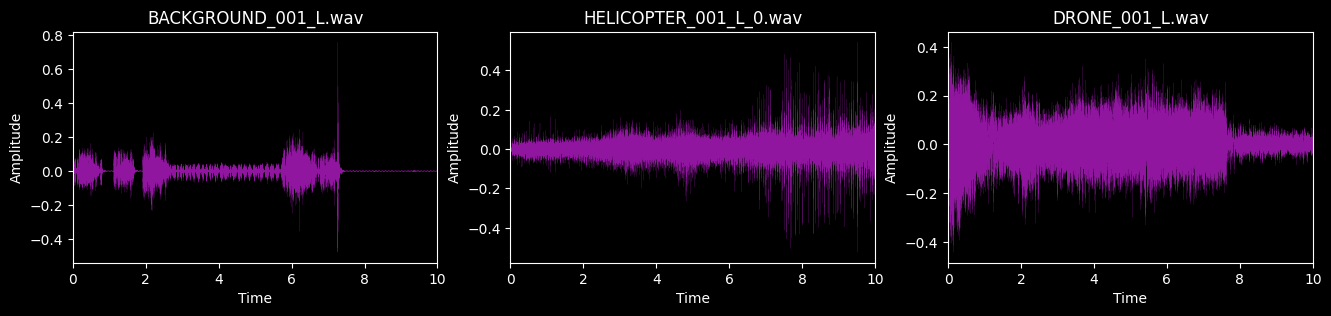

In [1]:
import matplotlib.pyplot as plt

from hs_hackathon_drone_acoustics import EXAMPLES_DIR
from hs_hackathon_drone_acoustics.base import AudioWaveform
from hs_hackathon_drone_acoustics.plot import plot_waveform  # Custom function used to plot waveforms

example_files = list(EXAMPLES_DIR.glob("*.wav"))
fig, axes = plt.subplots(1, len(example_files), figsize=(16, 3))
for ifile, example_file in enumerate(example_files):
    waveform = AudioWaveform.load(example_file)
    plot_waveform(waveform, axis=axes[ifile])
    axes[ifile].set_title(example_file.name)

From these examples, we can already see differences between the different classes: the helicopter and drones classes appear to have white noise-like contents throughout, while the background has periods of silence.


To verify this observation, it is useful to plot the variations in a waveform's frequency components over time, also known as a **spectrogram**. Spectrograms are obtained by taking the magnitude of a [Short-Time Fourier Transform (STFT)](https://en.wikipedia.org/wiki/Short-time_Fourier_transform). Code to plot a spectrogram from a wavform is provided in the `hs_hackathon_drone_acoustics.plot.plot_spectrogram` function.

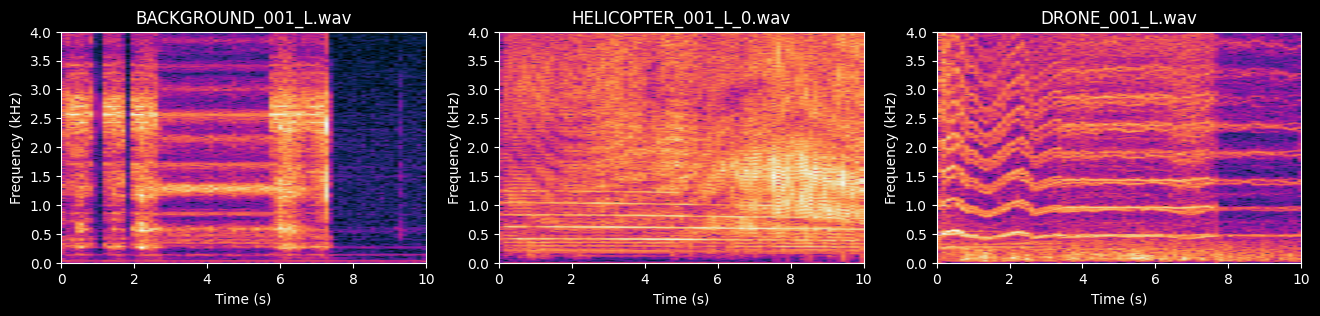

In [ ]:
from hs_hackathon_drone_acoustics.plot import plot_spectrogram

fig, axes = plt.subplots(1, len(example_files), figsize=(16, 3))
for ifile, example_file in enumerate(example_files):
    waveform = AudioWaveform.load(example_file)
    plot_spectrogram(waveform, axis=axes[ifile])
    axes[ifile].set_title(example_file.name)
    axes[ifile].set_ylim([0, 4])

### Extracting audio features

TODO(edolne): Add some code to extract features -- energy and MFCCs, from `simple_solution`.

## Baseline classification

### Creating datasets


In [ ]:
# TODO(edolne): Here we can add code to download the dataset and create datasets using `AudioDataset`?

### Training a simple classifier

In [3]:
# TODO(edolne): Add simple classifier from simple_solution.py

### Evaluating on the test set

In [4]:
# TODO(edolne): Run evaluation on test set.